## Exploratory data analysis for created context

In [38]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

### Graphical display of the context


In [62]:
# depth of this file in the project
file_depth = '../..'

with open(file_depth + '/config/data_25m_config.json') as config_file:
    config = json.load(config_file)

new_context_data_path = config['new_context_data']
context_data = pd.read_csv(file_depth + new_context_data_path , encoding="UTF-8")
context_data

,userId,movieId,day,isWeekday,season,partOfDay,holiday,movieYear,titleType,isAdult,...,genreNews,genreReality-tv,genreRomance,genreSci-fi,genreShort,genreSport,genreThriller,genreWar,genreWestern,rating
0,1,296,3,1,1,3,no_holiday,1994,movie,0,...,0,0,0,0,0,0,1,0,0,5.0
1,1,306,3,1,1,2,no_holiday,1994,movie,0,...,0,0,0,0,0,0,0,0,0,3.5
2,1,307,3,1,1,2,no_holiday,1993,movie,0,...,0,0,0,0,0,0,0,0,0,5.0
3,1,665,3,1,1,3,no_holiday,1995,movie,0,...,0,0,0,0,0,0,0,1,0,5.0
4,1,899,3,1,1,2,no_holiday,1952,movie,0,...,0,0,1,0,0,0,0,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24983464,162541,50872,2,1,1,4,no_holiday,2007,movie,0,...,0,0,0,0,0,0,0,0,0,4.5
24983465,162541,55768,2,1,1,4,no_holiday,2007,movie,0,...,0,0,0,0,0,0,0,0,0,2.5
24983466,162541,56176,2,1,1,4,no_holiday,2007,movie,0,...,0,0,0,0,0,0,0,0,0,2.0
24983467,162541,58559,2,1,1,4,no_holiday,2008,movie,0,...,0,0,0,0,0,0,0,0,0,4.0


In [21]:
context_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983469 entries, 0 to 24983468
Data columns (total 42 columns):
 #   Column            Dtype  
---  ------            -----  
 0   userId            int64  
 1   movieId           int64  
 2   day               int64  
 3   isWeekday         int64  
 4   season            int64  
 5   partOfDay         int64  
 6   holiday           object 
 7   movieYear         int64  
 8   titleType         object 
 9   isAdult           int64  
 10  runtimeMinutes    int64  
 11  directors         object 
 12  actor             object 
 13  genreAction       int64  
 14  genreAdult        int64  
 15  genreAdventure    int64  
 16  genreAnimation    int64  
 17  genreBiography    int64  
 18  genreChildren     int64  
 19  genreComedy       int64  
 20  genreCrime        int64  
 21  genreDocumentary  int64  
 22  genreDrama        int64  
 23  genreFamily       int64  
 24  genreFantasy      int64  
 25  genreFilm-noir    int64  
 26  genreHistory

Distribution of categorical data holiday

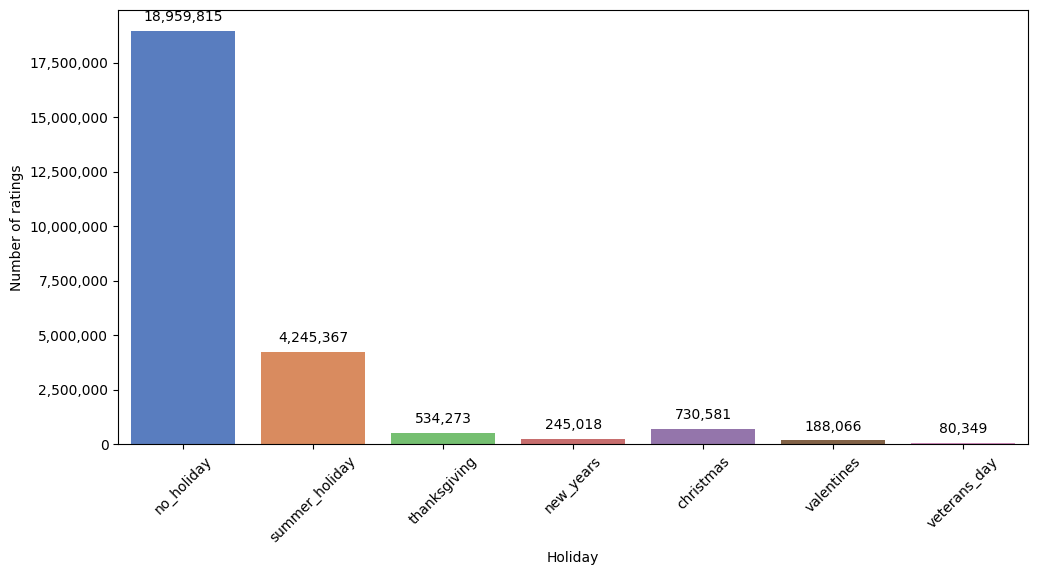

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=context_data, x='holiday', hue='holiday', palette='muted', legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Holiday')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45)
plt.tight_layout()

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


Distribution of categorical data titleType

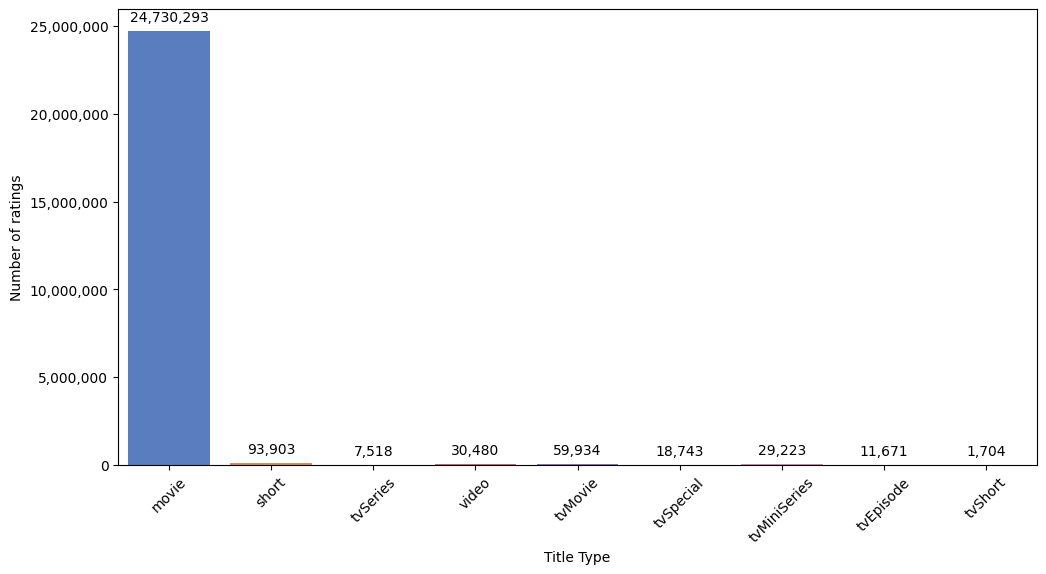

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=context_data, x='titleType', hue='titleType', palette='muted', legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Title Type')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45)
plt.tight_layout()

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


From histogram above we can see that titleType "movie" has the majority of rows. To demonstrate ratio of others, let's use titleType without "movie"

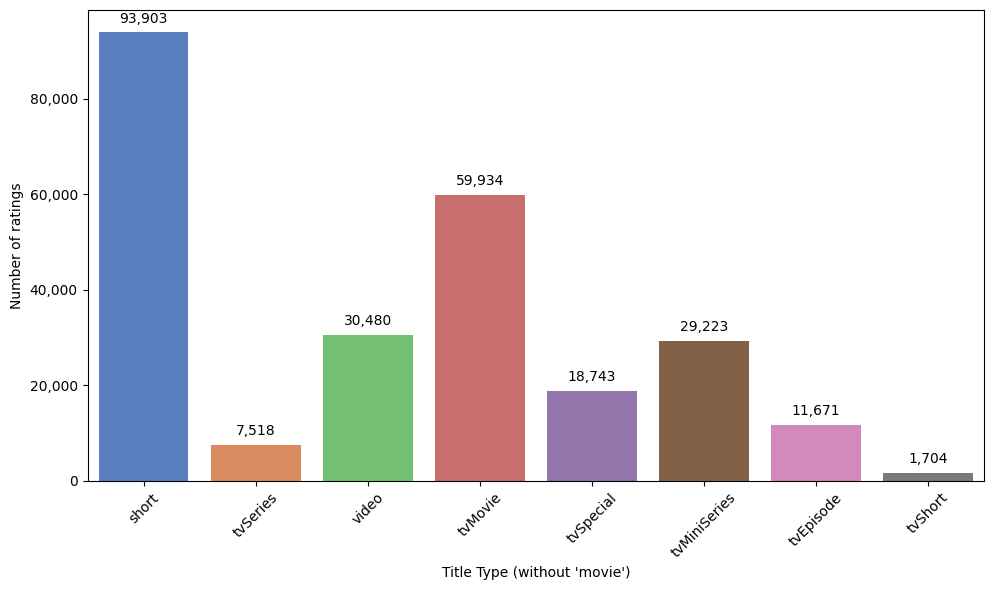

In [45]:
plt.figure(figsize=(10, 6))

no_movie_title_type_context_data = context_data[context_data['titleType'] != 'movie']

ax = sns.countplot(data=no_movie_title_type_context_data, x='titleType', hue='titleType', palette='muted', legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Title Type (without \'movie\')')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45)
plt.tight_layout()

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


Proportion of adult and non-adult movies

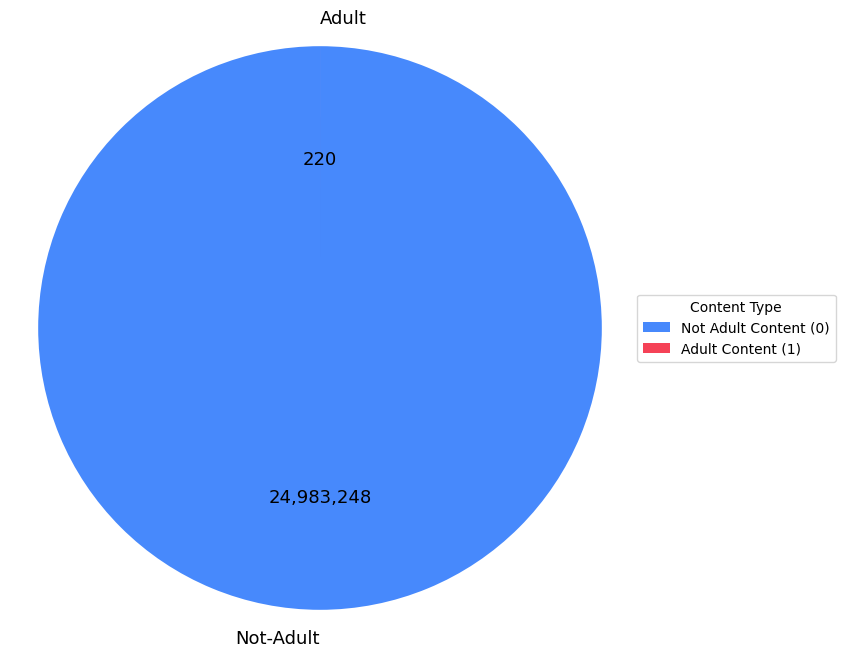

In [58]:
is_adult_counts = context_data['isAdult'].value_counts()

def absolute_value(val):
    a  = int(val/100.*is_adult_counts.sum())
    return f'{a:,}'

plt.figure(figsize=(8, 8))
plt.pie(is_adult_counts, labels=['Not-Adult', 'Adult'], autopct=absolute_value, startangle=90, colors=['#4789fc', '#f54257'], textprops={'fontsize': 13})
plt.axis('equal')
plt.legend(labels, title="Content Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

As we can see, the number of records where the isAdult column contains the value 1 is so small that it is not even visible on this pie chart (exactly 220). Let's take a look at what genre these isAdult movies have.


In [85]:
all_genres = ['genreAction', 'genreAdult', 'genreAdventure',
                 'genreAnimation', 'genreBiography', 'genreChildren', 'genreComedy', 'genreCrime', 'genreDocumentary',
                 'genreDrama', 'genreFamily', 'genreFantasy', 'genreFilm-noir', 'genreHistory', 'genreHorror',
                 'genreImax', 'genreMusic', 'genreMusical', 'genreMystery', 'genreNews', 'genreReality-tv',
                 'genreRomance', 'genreSci-fi', 'genreShort', 'genreSport', 'genreThriller', 'genreWar', 'genreWestern']

def concatenate_genres(row, genres):
    genre_list = [genre for genre in genres if row[genre] == 1]
    return ', '.join(genre_list)

def add_genre_column(dataframe, genres):
    dataframe.loc[:, 'concatenated_genres'] = dataframe.apply(lambda row: concatenate_genres(row, genres), axis=1)
    return dataframe

adult_context_data = context_data[context_data['isAdult'] == 1].copy()
adult_context_data = add_genre_column(adult_context_data, all_genres)

adult_context_data[['concatenated_genres', 'userId', 'movieId', 'day', 'isWeekday', 'season', 'partOfDay', 'holiday', 'movieYear', 'titleType', 'isAdult', 'runtimeMinutes', 'directors', 'actor', 'rating']]


,concatenated_genres,userId,movieId,day,isWeekday,season,partOfDay,holiday,movieYear,titleType,isAdult,runtimeMinutes,directors,actor,rating
106677,genreDocumentary,803,8129,2,1,2,4,summer_holiday,1999,movie,1,86,nm0507236,nm0416433,3.0
339683,genreDocumentary,2360,8129,3,1,1,4,no_holiday,1999,movie,1,86,nm0507236,nm0416433,1.5
380336,genreDocumentary,2618,8129,5,1,4,4,no_holiday,1999,movie,1,86,nm0507236,nm0416433,4.0
423834,"genreDrama, genreHorror, genreMystery",2938,84792,6,0,4,3,christmas,1996,movie,1,110,nm0958558,nm0070399,4.5
606853,"genreAdult, genreHorror, genreThriller",4149,131300,1,1,1,4,no_holiday,1975,movie,1,95,nm0895804,nm0459788,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24289833,genreDocumentary,157964,8129,3,1,2,3,summer_holiday,1999,movie,1,86,nm0507236,nm0416433,3.0
24396931,"genreDrama, genreHorror, genreMystery",158638,84792,5,1,1,3,no_holiday,1996,movie,1,110,nm0958558,nm0070399,2.0
24509252,genreHorror,159380,102828,4,1,1,1,no_holiday,2010,movie,1,103,nm0478418,nm0356122,2.5
24645053,"genreDrama, genreHorror, genreMystery",160256,84792,3,1,3,4,no_holiday,1996,movie,1,110,nm0958558,nm0070399,2.0


It seems that these are movies with the theme of horror, thriller and mystery.